In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import reverse_geocoder as geo 
import itertools
from geopy.distance import great_circle
import scipy.stats as stats
import datetime

In [3]:
data = pd.read_csv('taxi-trips.csv')
myframe = pd.DataFrame(data)

print(myframe.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [4]:
print(myframe.describe())

           vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  118185.000000    118185.000000     118185.000000    118185.000000   
mean        1.534958         1.657148        -73.973971        40.751392   
std         0.498779         1.313844          0.040456         0.027958   
min         1.000000         0.000000        -79.487900        40.225803   
25%         1.000000         1.000000        -73.991875        40.737835   
50%         2.000000         1.000000        -73.981796        40.754501   
75%         2.000000         2.000000        -73.967575        40.768471   
max         2.000000         6.000000        -73.425018        41.292198   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      118185.000000     118185.000000  118185.000000  
mean          -73.973538         40.752212     927.186310  
std             0.039192          0.032284    3118.710246  
min           -79.487900         40.225800       1.000000  
25%           -

In [5]:
myframe.shape

(118185, 11)

In [6]:
pick = list(map(tuple, myframe.iloc[:, [6,5]].values))
forpick = list(pick)
drop = map(tuple, myframe.iloc[:, [8,7]].values)
fordrop = list(drop)

appendme = list()
attr = geo.search(pick)
for each in attr:
    appendme.append(each["name"])
myframe["pickup_distric"] = appendme

attrdrop = geo.search(fordrop)
dropappend = list()
for each in attrdrop:
    dropappend.append(each["name"])
myframe["dropoff_distric"] = dropappend
myframe


Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_distric,dropoff_distric
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York


In [7]:
newdat = pd.DataFrame(myframe["pickup_distric"].value_counts(dropna =True))
newdat.head()


,pickup_distric
Manhattan,45329
New York City,34625
Long Island City,17787
Weehawken,11334
The Bronx,2777


In [8]:
newdat = pd.DataFrame(myframe["dropoff_distric"].value_counts(dropna =True))
newdat.head()


,dropoff_distric
Manhattan,44478
New York City,31082
Long Island City,19919
Weehawken,10621
Brooklyn,2059


In [9]:
dis = list(map(tuple, myframe.iloc[:, [6,5]].values))
dista = list(map(tuple, myframe.iloc[:, [8,7]].values))
yeni = list()
zippedfile = zip(dis,dista)
def Distance(x):
    for key,value in x:
        yeni.append(great_circle(key,value).miles)
    return yeni    
copyme = Distance(zippedfile)
myframe["distance"] = copyme
myframe


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_distric,dropoff_distric,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032


In [10]:
myframe['Date/Time'] = pd.to_datetime(myframe['pickup_datetime'], format="%Y/%m/%d %H:%M:%S")
myframe['HourOfDay'] = myframe['Date/Time'].dt.hour
addhours = list()

for each in myframe['HourOfDay']:
    eachint = int(each)
    if(eachint >= 7 and eachint < 9):
        addhours.append("rush_hour_morning")
    if(eachint >= 9 and eachint < 16):
        addhours.append("afternoon")
    if(eachint >= 16 and eachint < 18):
        addhours.append("rush_hour_evening")
    if(eachint >= 18 and eachint < 23):
        addhours.append("evening")
    if(eachint == 23 or eachint <= 6):
        addhours.append("late_night")
del myframe['HourOfDay']
del myframe['Date/Time']
myframe["time_of_day"] = addhours
myframe

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_distric,dropoff_distric,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032,late_night


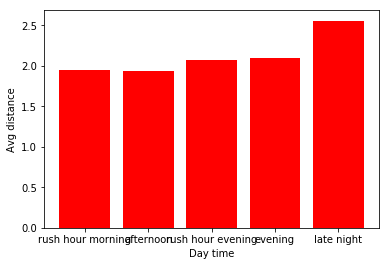

In [11]:
x = ['rush hour morning', 'afternoon', 'rush hour evening', 'evening', 'late night']
time1 = myframe["time_of_day"] == "rush_hour_morning"
time2 = myframe["time_of_day"] == "afternoon"
time3 = myframe["time_of_day"] == "rush_hour_evening"
time4 = myframe["time_of_day"] == "evening"
time5 = myframe["time_of_day"] == "late_night"
time = [time1,time2,time3,time4,time5]
Daytime= [myframe[time1].distance.mean(),myframe[time2].distance.mean(),myframe[time3].distance.mean(),myframe[time4].distance.mean(),myframe[time5].distance.mean()]
y_pos = np.arange(len(Daytime))
plt.bar(y_pos, Daytime, align ='center', color='red')
plt.xlabel("Day time")
plt.ylabel("Avg distance")
plt.xticks(y_pos, x)
plt.show()

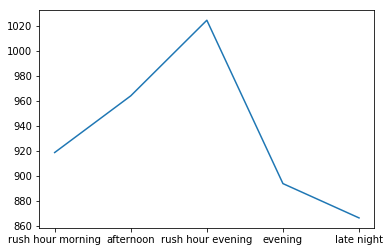

In [12]:

x = np.array([0,1,2,3,4])
time1 = myframe["time_of_day"] == "rush_hour_morning"
time2 = myframe["time_of_day"] == "afternoon"
time3 = myframe["time_of_day"] == "rush_hour_evening"
time4 = myframe["time_of_day"] == "evening"
time5 = myframe["time_of_day"] == "late_night"
y = np.array([myframe[time1].trip_duration.mean(),myframe[time2].trip_duration.mean(),myframe[time3].trip_duration.mean(),myframe[time4].trip_duration.mean(),myframe[time5].trip_duration.mean()])
my_xticks = ['rush hour morning', 'afternoon', 'rush hour evening', 'evening', 'late night']
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()   

In [13]:
 #Hyphotesis test
ofist = myframe[["distance"]][myframe["passenger_count"] < 2]
vall = myframe[["distance"]][myframe["passenger_count"] >= 2]                              

stats.ttest_ind(ofist , vall)



Ttest_indResult(statistic=array([-4.95908744]), pvalue=array([7.0923006e-07]))

In [18]:
myframe['Date/Time'] = pd.to_datetime(myframe['pickup_datetime'], format="%Y/%m/%d %H:%M:%S")
myframe['DayOfWeekNum'] = myframe['Date/Time'].dt.dayofweek
ofist = myframe[["distance"]][myframe["DayOfWeekNum"] < 5]
vall = myframe[["distance"]][myframe["DayOfWeekNum"] >= 5]  
del myframe['Date/Time']
del myframe['DayOfWeekNum']
stats.ttest_ind(ofist , vall)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_distric,dropoff_distric,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032,late_night
